In [1]:
# data processing
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
# linear algebra
import numpy as np 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [2]:
#IMPORTATION DES DONNEES titanic_train pour le training de l'(algo)
titanic_train = pd.read_csv(r"/Users/ano/Desktop/projet_2/titanic/train.csv",encoding = "latin1")
#IMPORTATION DES DONNEES titanic_test 
titanic_test = pd.read_csv(r"/Users/ano/Desktop/projet_2/titanic/test.csv",encoding = "latin1")
print(titanic_test)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

In [3]:
#description de la data set
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#nombre de ligne et de colonne
titanic_train.shape

(891, 12)

In [6]:
#recupération de maximun de détailles( examiner les valeurs manquante)
total = titanic_train.isnull().sum().sort_values(ascending=False)
percent_1 = titanic_train.isnull().sum()/titanic_train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [7]:
titanic_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

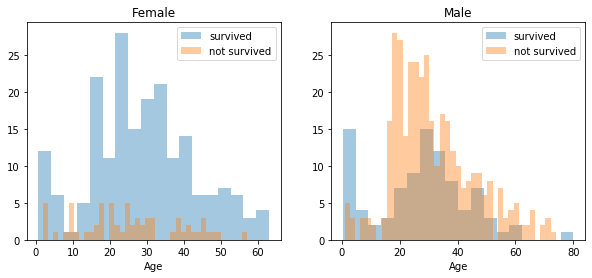

In [8]:
#il serait logique que tout sauf «PassengerId», «Ticket» et «Name» soit en corrélation avec un taux de survie élevé.
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titanic_train[titanic_train['Sex']=='female']
men = titanic_train[titanic_train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')


/Users/ano/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


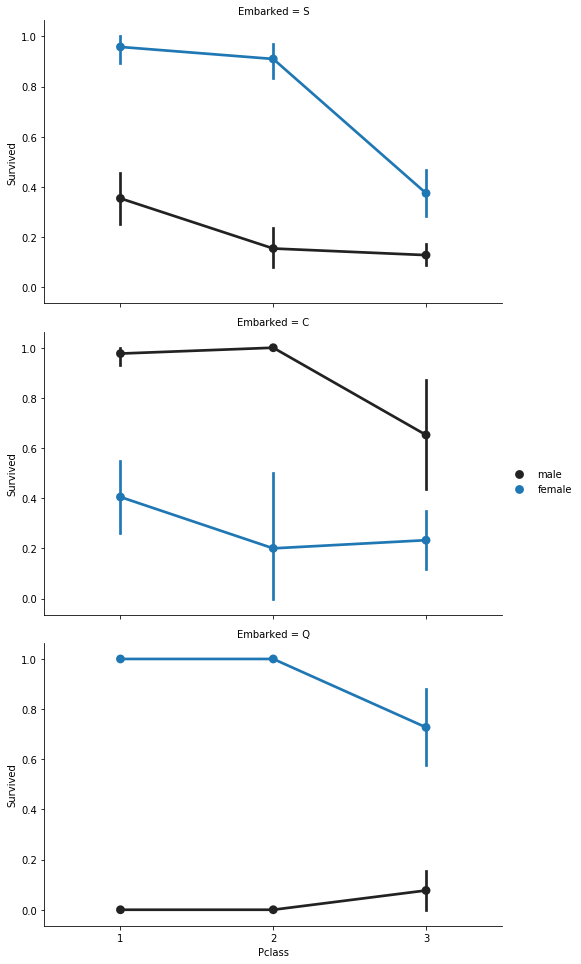

In [9]:
#Embarked, Pclass et Sex
FacetGrid = sns.FacetGrid(titanic_train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [10]:
#Embarqué semble être en corrélation avec la survie, selon le sexe.
#Les femmes au port Q et au port S ont plus de chances de survivre. 
#L'inverse est vrai, s'ils sont au port C. Les hommes ont une forte probabilité de survie s'ils sont au port C, 
#mais une faible probabilité s'ils sont au port Q ou S.

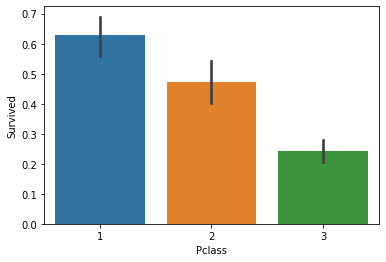

In [11]:
sns.barplot(x='Pclass', y='Survived', data=titanic_train)

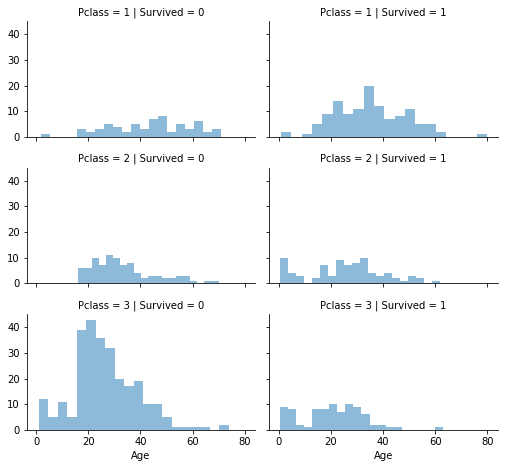

In [12]:
grid = sns.FacetGrid(titanic_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [13]:
# caluler le nombre de famille 
data = [titanic_train, titanic_test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
titanic_train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

/Users/ano/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


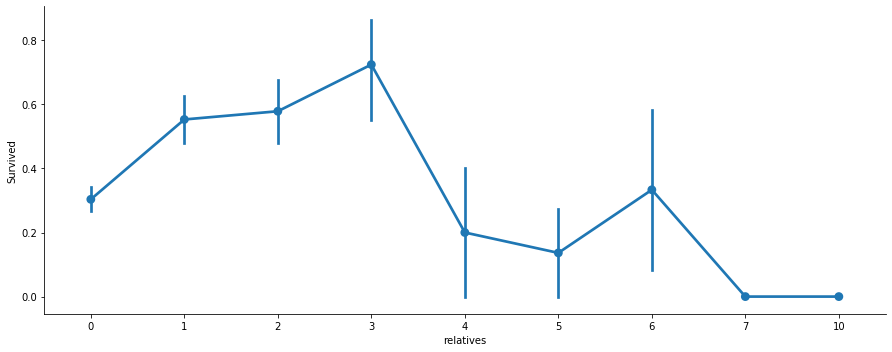

In [14]:
es = sns.factorplot('relatives','Survived', 
                      data=titanic_train, aspect = 2.5, )
#Ici, nous pouvons voir que vous aviez une forte probabilité de survie avec 1 à 3 parents,
# mais une probabilité plus faible si vous aviez moins de 1 ou plus de 3 
#(sauf dans certains cas avec 6 parents).

In [15]:
# data Cleaner
titanic_train = titanic_train.drop(['PassengerId'], axis=1)
#celui-ci est unitile a notre data set

In [16]:
titanic_train = titanic_train.drop(['Cabin'], axis=1)
titanic_test = titanic_test.drop(['Cabin'], axis=1)

In [17]:
#cleaner de la variable age
data = [titanic_train, titanic_test]

for dataset in data:
    mean = titanic_train["Age"].mean()
    std = titanic_test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = titanic_train["Age"].astype(int)
titanic_train["Age"].isnull().sum()

0

In [18]:
#nettoyage de embarked
titanic_train['Embarked'].describe()
#on voie quelle ne contient que trois variable NAN on les remplaces par les plus courant

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [19]:
common_value = 'S'
data = [titanic_train, titanic_test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [20]:
#exporter le fichier training en CVS dans mon dossier pour analuse avec visuelle sur power BI
titanic_train.to_csv('/Users/ano/Desktop/projet_2/titanic/titanic_train_cleaner.csv', sep = ',',index = True)
#exporter le fichier test en CVS dans mon dossier pour analuse avec visuelle sur power BI
titanic_test.to_csv('/Users/ano/Desktop/projet_2/titanic/titanic_test_cleaner.csv', sep = ',', index = True)
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int64
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null object
relatives    891 non-null int64
not_alone    891 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 83.7+ KB


In [21]:
#on transforme le prix ou FARE qui est float en INT
data = [titanic_train, titanic_test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [22]:
data = [titanic_train, titanic_test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)


#si on souhaite supprimer les variable NAME
#titanic_train= titanic_train.drop(['Name'], axis=1)
#titanic_test= test_df.drop(['Name'], axis=1)


In [23]:
#convertise le sex en numeric male:0 femal:1
genders = {"male": 0, "female": 1}
data = [titanic_train, titanic_test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [24]:
# pour la variable ticket on va juste les suprimer car il manque beaucoup trop de donné en NAN 
#qui font plus de la moitier des données
titanic_train = titanic_train.drop(['Ticket'], axis=1)
titanic_test = titanic_test.drop(['Ticket'], axis=1)

In [25]:
#convertire la variable Embarked en mumeric ( S=0 , C=1 , Q=2)
ports = {"S": 0, "C": 1, "Q": 2}
data = [titanic_train, titanic_test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [26]:
#on créé les catégorie d'ages(1,2,3,4,5,6)
data = [titanic_train, titanic_test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6
#titanic_train['Age'].describe()

In [27]:
titanic_train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title
0,0,3,"Braund, Mr. Owen Harris",0,2,1,0,7,0,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,71,1,1,0,3
2,1,3,"Heikkinen, Miss. Laina",1,3,0,0,7,0,0,1,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,53,0,1,0,3
4,0,3,"Allen, Mr. William Henry",0,5,0,0,8,0,0,1,1
5,0,3,"Moran, Mr. James",0,1,0,0,8,2,0,1,1
6,0,1,"McCarthy, Mr. Timothy J",0,6,0,0,51,0,0,1,1
7,0,3,"Palsson, Master. Gosta Leonard",0,0,3,1,21,0,4,0,4
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,3,0,2,11,0,2,0,3
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1,1,0,30,1,1,0,3


In [28]:
#Pour la fonction «Tarif», nous devons faire de même que pour la fonction «Âge».
#Mais ce n'est pas si simple, car si nous réduisions la fourchette des valeurs tarifaires en quelques catégories également importantes, 
#80% des valeurs tomberaient dans la première catégorie. Heureusement, nous pouvons utiliser la fonction sklearn «qcut ()», que nous pouvons utiliser pour voir, comment nous pouvons former les catégories.
data = [titanic_train, titanic_test]

for dataset in data:
    #dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    #dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    #dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    #dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    #dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    #dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [29]:
#colone age par classe 
data = [titanic_train, titanic_test]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [30]:
#colonne prix par personne FARE
#for dataset in data:
    #dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    #dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)


Survived     0
Pclass       0
Name         0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
relatives    0
not_alone    0
Title        0
Age_Class    0
dtype: int64


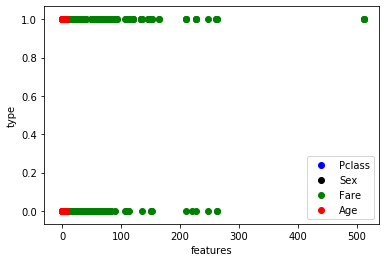

In [31]:
#je reverifie bien si mon dossier n'a plus de Nan et qui celle ci est belle et bien cleaner
print(titanic_train.isna().sum())


plt.xlabel('features')
plt.ylabel('type')
pltX=titanic_train.loc[:,'Survived']
pltY=titanic_train.loc[:,'Pclass']
plt.scatter(pltY,pltX, color ='blue', label='Pclass')

pltX=titanic_train.loc[:,'Survived']
pltY=titanic_train.loc[:,'Sex']
plt.scatter(pltY,pltX, color ='black', label='Sex')

pltX=titanic_train.loc[:,'Survived']
pltY=titanic_train.loc[:,'Fare']
plt.scatter(pltY,pltX, color ='green', label='Fare')

pltX=titanic_train.loc[:,'Survived']
pltY=titanic_train.loc[:,'Age']
plt.scatter(pltY,pltX, color ='red', label='Age')

plt.legend()
plt.show()
#ce type de graphique montre deja que les donné sont plus adapter au teste de regression logistique..;

In [32]:
titanic_train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title,Age_Class
0,0,3,"Braund, Mr. Owen Harris",0,2,1,0,7,0,1,0,1,6
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,71,1,1,0,3,5
2,1,3,"Heikkinen, Miss. Laina",1,3,0,0,7,0,0,1,2,9
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,53,0,1,0,3,5
4,0,3,"Allen, Mr. William Henry",0,5,0,0,8,0,0,1,1,15
5,0,3,"Moran, Mr. James",0,1,0,0,8,2,0,1,1,3
6,0,1,"McCarthy, Mr. Timothy J",0,6,0,0,51,0,0,1,1,6
7,0,3,"Palsson, Master. Gosta Leonard",0,0,3,1,21,0,4,0,4,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,3,0,2,11,0,2,0,3,9
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1,1,0,30,1,1,0,3,2


In [33]:
X_train = titanic_train.drop("Survived", axis=1)
X_train = titanic_train.drop("Name", axis=1)
Y_train = titanic_train["Survived"]
X_test  = titanic_test.drop("PassengerId", axis=1).copy()
X_test = titanic_test.drop("Name", axis=1)

In [35]:
X_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title,Age_Class
0,0,3,0,2,1,0,7,0,1,0,1,6
1,1,1,1,5,1,0,71,1,1,0,3,5
2,1,3,1,3,0,0,7,0,0,1,2,9
3,1,1,1,5,1,0,53,0,1,0,3,5
4,0,3,0,5,0,0,8,0,0,1,1,15
5,0,3,0,1,0,0,8,2,0,1,1,3
6,0,1,0,6,0,0,51,0,0,1,1,6
7,0,3,0,0,3,1,21,0,4,0,4,0
8,1,3,1,3,0,2,11,0,2,0,3,9
9,1,2,1,1,1,0,30,1,1,0,3,2


In [36]:
#descente de gradient
model_sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
model_sgd.fit(X_train, Y_train)
Y_pred = model_sgd.predict(X_test)

model_sgd.score(X_train, Y_train)

acc_sgd = round(model_sgd.score(X_train, Y_train) * 100, 2)


print(model_sgd.intercept_)
print(model_sgd.coef_)

#calcul du R²
print("R² :", model_sgd.score(X_train,Y_train))

RMSE=np.sqrt(((Y_train-model_sgd.predict(X_train))**2).sum()/len(Y_train))
print("RMSE :", RMSE)

[-339.91650768]
[[1156.94902824 -313.53135314  484.04840484 -265.85991933 -326.36596993
   -29.33626696  130.17968464  121.01210121 -355.70223689 -168.68353502
   298.86321966  -99.00990099]]
R² : 0.7699214365881033
RMSE : 0.47966505335691983


In [37]:
# RANDOM FOREST
#la forêt aléatoire construit plusieurs arbres de décision sur notre data set titanic et 
#les fusionne pour obtenir une prédiction plus précise et stable.
#Un grand avantage de la forêt aléatoire est qu'elle peut être utilisée à la fois pour des problèmes de classification et de régression
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)



RMSE=np.sqrt(((Y_train-random_forest.predict(X_train))**2).sum()/len(Y_train))
print("RMSE :", RMSE)
print("R² :",random_forest.score(X_train,Y_train))

RMSE : 0.0
R² : 1.0


In [38]:
# Modèle de régression logistique
#Construire un premier modèle de régression logistique avec plusieur variable variable explicative comme la classe l'age
#le sex homme ou femme et l'embarcastion diviser en 3 type de colonne distint chacune.

from sklearn.linear_model import LogisticRegression
reg_log = LogisticRegression(solver='lbfgs', multi_class='auto', random_state = 0)
reg_log.fit(X_train, Y_train)

# Prédictions des probabilités
prob_pred = reg_log.predict_proba(X_train)

# Prédictions des résultats du Test train set
Y_pred = reg_log.predict(X_train)

# Matrice de confusion
from sklearn.metrics import confusion_matrix
#affichage plus de la matrice de confusion
cm = pd.DataFrame(confusion_matrix(Y_train, Y_pred), columns=['prédit ' + str(_) for _ in reg_log.classes_])
cm.index = ['vrai ' + str(_) for _ in reg_log.classes_]
cm


/Users/ano/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,prédit 0,prédit 1
vrai 0,549,0
vrai 1,0,342


In [39]:
acc_log = round(reg_log.score(X_train, Y_train) * 100, 2)

In [40]:
print(reg_log.intercept_)
print(reg_log.coef_)

#calcul du R²
print("R² :", reg_log.score(X_train,Y_train))


#RMSE=np.sqrt(((Y_train-reg_log.predict_proba(X_train))**2).sum()/len(Y_train))
#print("RMSE :", RMSE)


[-1.25005032]
[[ 7.46206286e+00 -1.01868392e+00  8.11859608e-01 -3.69261839e-01
  -1.54167819e-01 -2.19789270e-02 -2.26271945e-04  1.50085126e-01
  -1.76146746e-01 -5.28233551e-01  2.03125767e-01  9.71887921e-02]]
R² : 1.0


In [41]:
#elle classifi par rapport au variable voisine plus les donner ce ressemble mieux il pourra les catégoriser pour effectuer la classification et prediction
# KNN 
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

#calcul du R²
print("R² :", knn.score(X_train,Y_train))


RMSE=np.sqrt(((Y_train-knn.predict(X_train))**2).sum()/len(Y_train))
print("RMSE :", RMSE)


R² : 0.9147025813692481
RMSE : 0.2920572180767871


In [42]:
#affichage de touts les resultats 
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 
              ' Gradient Decent'],
    'Score': [ acc_knn, acc_log, 
              acc_random_forest, 
              acc_sgd]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Logistic Regression
100.00,Random Forest
91.47,KNN
76.99,Gradient Decent


In [43]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean: 1.0
Standard Deviation: 0.0


In [44]:
"https://miro.medium.com/max/1400/1*GiCvHwZ03tObjkD-6mSqag.png"

'https://miro.medium.com/max/1400/1*GiCvHwZ03tObjkD-6mSqag.png'

In [45]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Survived,0.697
Sex,0.090
Title,0.088
Fare,0.032
Pclass,0.030
relatives,0.016
Age_Class,0.015
Age,0.010
SibSp,0.007


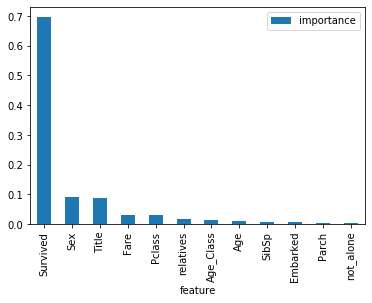

In [46]:
importances.plot.bar()

In [47]:
# sur le plot au dessus on remarque bien que les variable PACH ET NOT_ALONE n'ont pas d'impacte sur nos model
#donc je les suprimmes

In [48]:
titanic_train  = titanic_train.drop("not_alone", axis=1)
titanic_test = titanic_test.drop("not_alone", axis=1)

titanic_train = titanic_train .drop("Parch", axis=1)
titanic_test  = titanic_test.drop("Parch", axis=1)

In [49]:
# Random Forest
# normalement il faut savoir qu'on peut encore re entrainé notre model de randome foreste pour mieux le perfectionné
#mais cela ne servirais a rien pour notre cas vue que celle-ci a des stats a 100%
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

100.0 %


In [50]:
# un test qui plus precis que le score R
#existe également une autre façon d'évaluer un classificateur de forêt aléatoire,
#qui est probablement beaucoup plus précis que le score que nous avons utilisé auparavant..
#la aussi sa ne sert a rien vue que je suis a 100
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 100.0 %


In [51]:

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)


array([[549,   0],
       [  0, 342]])

In [52]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 1.0
Recall: 1.0


In [53]:
#moyenne entre R score et prescision
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

1.0

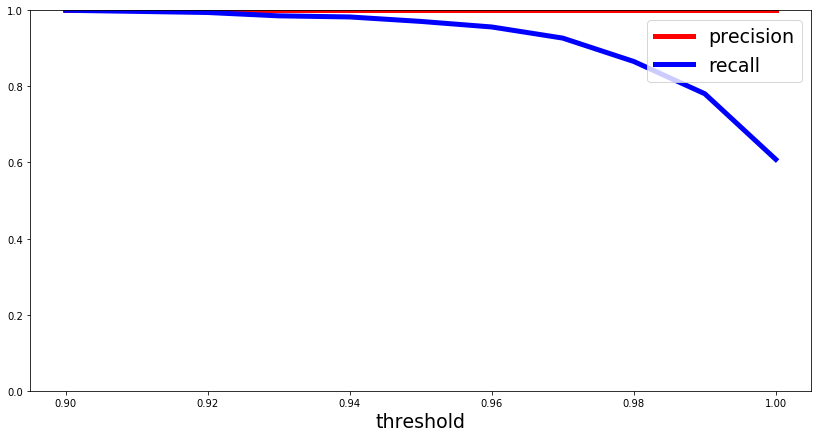

In [54]:
#Pour chaque personne que l'algorithme Random Forest doit classer,
#il calcule une probabilité basée sur une fonction et il classe la personne comme ayant survécu 
#(lorsque le score est supérieur au seuil) ou comme n'ayant pas survécu (lorsque le score est inférieur au seuil) . C’est pourquoi le seuil joue un rôle important.
#Nous allons tracer la précision et R2 

from sklearn.metrics import precision_recall_curve
#Nous allons tracer la précision et rappeler avec le seui
# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

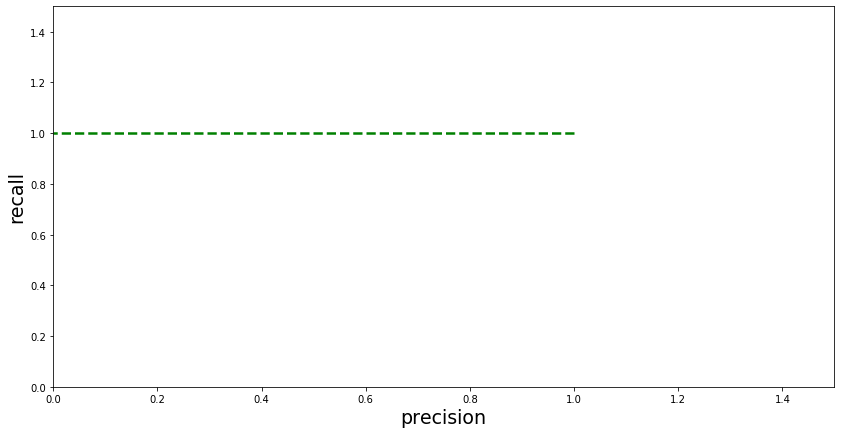

In [55]:
#Ci-dessus, vous pouvez clairement voir que le rappel diminue rapidement avec une précision d'environ 100%
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

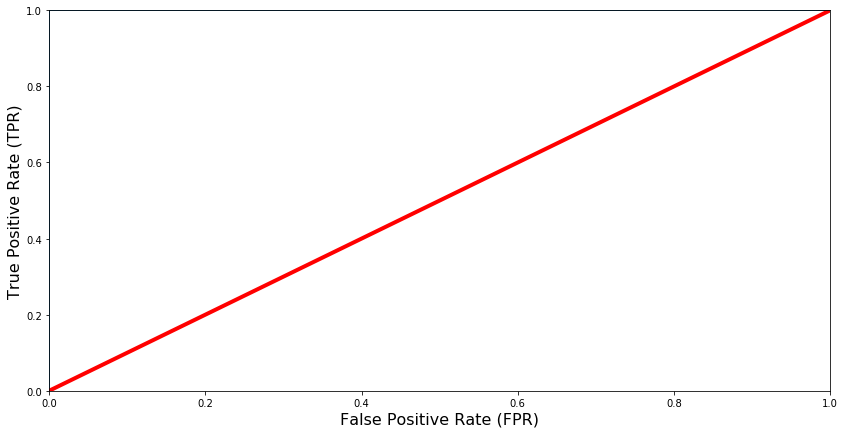

In [56]:
#ROC AUC Curve
#Cette courbe trace le taux positif réel (également appelé rappel)
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()
#ici inexistant car notre model est parfait donc celle- n'apparait pas 

In [57]:
#Score ROC AUC
#Le score ROC AUC est le score correspondant à la courbe ROC AUC.
#Il est simplement calculé en mesurant l'aire sous la courbe, qui est appelée AUC.
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 1.0


In [ ]:
###TESTE A MOI### RECHERCHE SUR UNE SEULE PASSAGER AVEC REGRESSION LOGISTIQUE ET POUR 4 VARIABLE ###

In [76]:
X_train.head(5)

,Pclass,Sex,Age,Parch,Fare
0,3,0,2,0,7
1,1,1,5,0,71
2,3,1,3,0,7
3,1,1,5,0,53
4,3,0,5,0,8


In [70]:
#del X_train['Survived']
#del X_train['Embarked']
#del X_train['relatives']
#del X_train['Title']
#del X_train['Age_Class']
#del X_train['SibSp']
#del X_train['not_alone']
#del X_train['Parch']

In [80]:
X_train.head(5)

,Pclass,Sex,Age,Parch,Fare
0,3,0,2,0,7
1,1,1,5,0,71
2,3,1,3,0,7
3,1,1,5,0,53
4,3,0,5,0,8


In [78]:
from sklearn.linear_model import LogisticRegression
reg_log = LogisticRegression(solver='lbfgs', multi_class='auto', random_state = 0)
reg_log.fit(X_train, Y_train)

# Prédictions des probabilités
prob_pred = reg_log.predict_proba(X_train)

# Prédictions des résultats du Test train set
Y_pred = reg_log.predict(X_train)

# Matrice de confusion
from sklearn.metrics import confusion_matrix
#affichage plus de la matrice de confusion
cm = pd.DataFrame(confusion_matrix(Y_train, Y_pred), columns=['prédit ' + str(_) for _ in reg_log.classes_])
cm.index = ['vrai ' + str(_) for _ in reg_log.classes_]
cm

,prédit 0,prédit 1
vrai 0,468,81
vrai 1,108,234


In [79]:
print(reg_log.intercept_)
print(reg_log.coef_)

#calcul du R²
print("R² :", reg_log.score(X_train,Y_train))

[1.29960322]
[[-9.89663502e-01  2.59047717e+00 -1.60369596e-01 -1.93186011e-01
   2.17789572e-03]]
R² : 0.7878787878787878


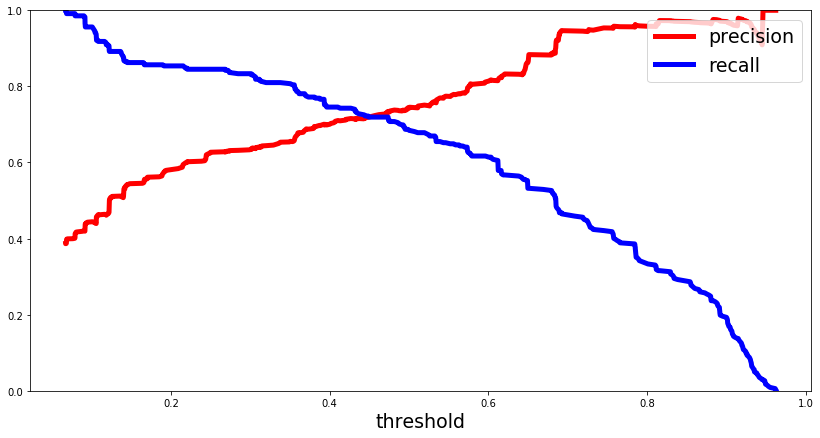

In [84]:
from sklearn.metrics import precision_recall_curve
#Nous allons tracer la précision et rappeler avec le seui
# getting the probabilities of our predictions
y_scores = reg_log.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [ ]:
# ON essaie de predire si le passager clement a survecu ou est mort ####

In [83]:
classe_lucien=3

sexe_lucien=0 # sexe vaut 1 pour les femmes et 0 pour les hommes

age_lucien=2

prix_billet_lucien=15

parch_lucien=0

## On insère tout dans un seul et même objet appelé "lucien"

lucien=np.array([classe_lucien,sexe_lucien,age_lucien,parch_lucien,prix_billet_lucien]).reshape(1, -1)

## Puis on demande la prédiction de survie

print(reg_log.predict(lucien))

[0]


In [ ]:
#ON VOIT QUE LE RESULTAT DE CELUI_CI EST 0 DONC IL EST PREDIT QU'IL MEURT durant le nofrage

In [ ]:
#SOMMAIRE
#Nous avons commencé par l'exploration des données où nous avons eu une idée de l'ensemble de données,
#vérifié les données manquantes et appris quelles fonctionnalités sont importantes. 
#Au cours de ce processus, nous avons utilisé seaborn et matplotlib pour effectuer les visualisations.
#Au cours de la partie de prétraitement des données, nous avons calculé les valeurs manquantes, 
#converti les entités en valeurs numériques, regroupé les valeurs en catégories et créé quelques nouvelles entités.
#Ensuite, nous avons commencé à former 4 modèles d'apprentissage automatique différents, 
#en avons choisi un (forêt aléatoire) et y avons appliqué une validation croisée. 
#Ensuite, nous avons discuté du fonctionnement de la forêt aléatoire, 
#examiné l'importance qu'elle attribue aux différentes fonctionnalités et optimisé ses performances en optimisant ses valeurs hyperparamétriques. 
#Enfin, nous avons examiné sa matrice de confusion et calculé la précision, le rappel et le f-score du modèle.